In [14]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#loading the dataset
df = pd.read_csv('../AI-ML Group Project/Dataset/stroke_prediction_dataset.csv')
#".." means to go up one directory

In [16]:
#Snapshot of the dataset

In [17]:
#View the top 5 rows of the dataset
display(df.head())

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [18]:
#Checking the dataframe's dimensions, data types & non missing value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [26]:
#Only showing the columns with missing values & the percentage of missing values
missing_count = df.isnull().sum()
missing_count = missing_count[missing_count > 0] #Filter columns with missing values > 0
missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0] #Filter columns with missing percentages > 0


print("Missing Value:\n",missing_values)
print()
print("Missing Percentage:\n",missing_percent)

Missing Value:
 Symptoms    2500
dtype: int64

Missing Percentage:
 Symptoms    16.666667
dtype: float64


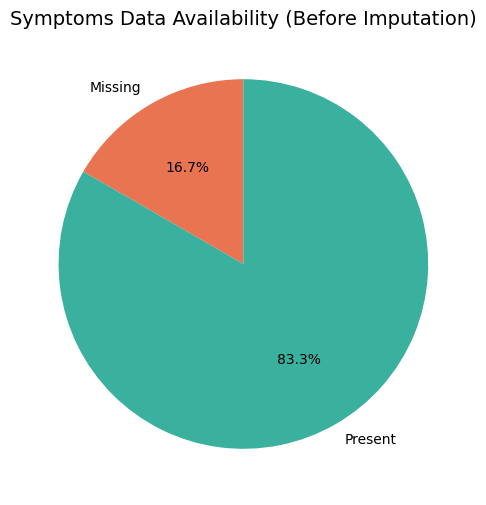

In [28]:
#EDA Visualization: Symptoms availability before imputation

missing_symptoms = df["Symptoms"].isnull().sum()
present_symptoms = df["Symptoms"].notnull().sum()

plt.figure(figsize=(6,6))
plt.pie(
    [missing_symptoms, present_symptoms],
    labels=["Missing", "Present"],
    autopct='%1.1f%%',
    startangle=90,
    colors=["#E97451","#3AB09E"]
)
plt.title("Symptoms Data Availability (Before Imputation)", fontsize=14)
plt.show()

In [30]:
#Dropping Irrelevant Columns

df.drop(["Patient ID", "Patient Name"], axis=1, inplace=True)

In [31]:
#Confirmation of change in dataframe
df.shape

(15000, 20)

In [32]:
#Handling missing values for "Symptoms" column
#Filling in missing values as "Uknown"
df.fillna({"Symptoms":"Unknown"}, inplace = True)

Symptoms
Headache               3850
Dizziness              3835
Loss of Balance        3831
Confusion              3813
Seizures               3778
Difficulty Speaking    3770
Weakness               3766
Numbness               3760
Blurred Vision         3746
Severe Fatigue         3691
Unknown                2500
Name: count, dtype: int64


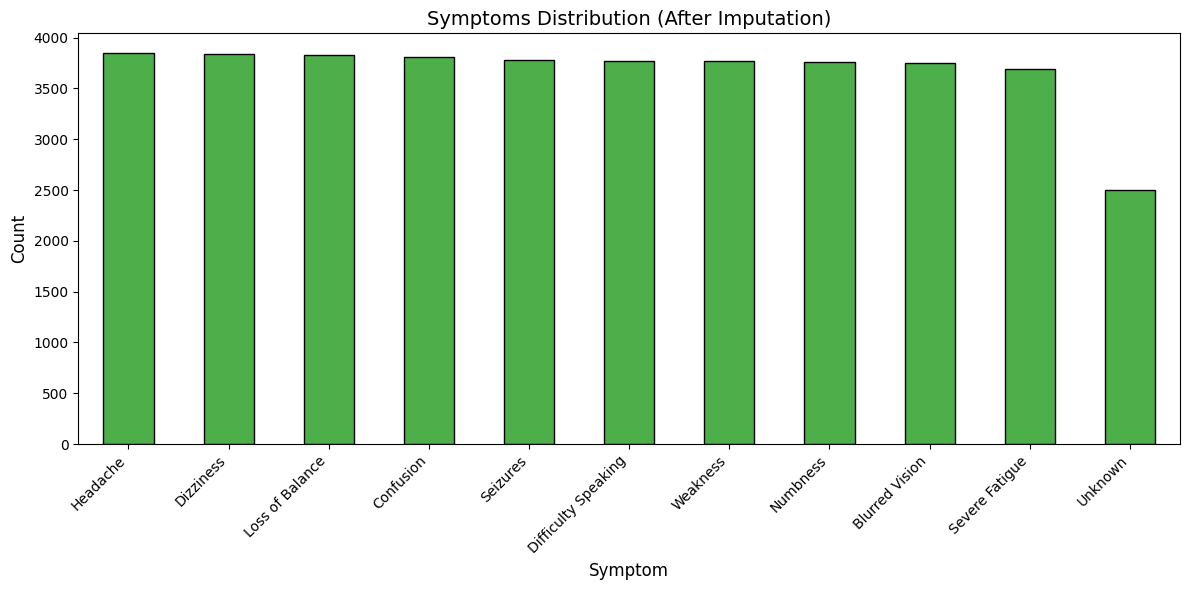

In [38]:
#EDA Visualization: Symptoms Distribution after Imputation

# Split symptoms by comma and add them all into a single list
all_symptoms = df["Symptoms"].dropna().str.split(',').explode().str.strip()

# Count each symptom
symptom_counts = all_symptoms.value_counts()
print(symptom_counts)

# Plot
plt.figure(figsize=(12,6))
symptom_counts.plot(kind='bar', color="#4daf4a", edgecolor="black")
plt.title("Symptoms Distribution (After Imputation)", fontsize=14)
plt.xlabel("Symptom", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [39]:
#Dataframe after handling missing values:
df.isnull().sum()

Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Marital Status              0
Work Type                   0
Residence Type              0
Average Glucose Level       0
Body Mass Index (BMI)       0
Smoking Status              0
Alcohol Intake              0
Physical Activity           0
Stroke History              0
Family History of Stroke    0
Dietary Habits              0
Stress Levels               0
Blood Pressure Levels       0
Cholesterol Levels          0
Symptoms                    0
Diagnosis                   0
dtype: int64

In [40]:
#Visualizing top 12 rows after change
df.head(12)

,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,56,Male,0,1,Married,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,80,Male,0,0,Single,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,26,Male,1,1,Married,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,73,Male,0,0,Married,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,51,Male,1,1,Divorced,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
5,62,Female,0,0,Single,Private,Urban,91.60,37.47,Currently Smokes,Social Drinker,High,0,No,Gluten-Free,4.85,132/64,"HDL: 80, LDL: 69",Severe Fatigue,Stroke
6,40,Female,1,0,Married,Private,Urban,77.83,28.20,Currently Smokes,Never,Low,1,No,Vegetarian,6.38,178/105,"HDL: 31, LDL: 134",Unknown,No Stroke
7,61,Female,0,1,Divorced,Government Job,Rural,194.73,26.44,Formerly Smoked,Rarely,Moderate,1,No,Vegan,5.85,179/72,"HDL: 66, LDL: 134",Loss of Balance,Stroke
8,72,Female,1,1,Married,Self-employed,Rural,72.99,30.10,Formerly Smoked,Rarely,High,1,No,Vegetarian,0.73,141/106,"HDL: 71, LDL: 140","Loss of Balance, Dizziness, Difficulty Speaking",Stroke
9,82,Male,0,0,Divorced,Self-employed,Urban,111.23,28.83,Currently Smokes,Rarely,High,1,Yes,Non-Vegetarian,8.39,119/88,"HDL: 32, LDL: 88",Unknown,No Stroke


In [41]:
#As showm above only the "Symptoms" column had missing values
#Subsequently the pie chart shows us that, that value approximates to 16.7%. 
#Since dropping rows would've resulted in losing a large portion of the dataset, an imputation was necessary

#Irrelavant Columns, ones not helpful for stroke prediction, were dropped. (Dropping Identifiers and not predictors)

#Empty cells in Symptoms column were filled with "Unknown" as someone may not have reported symptoms due to death, incapacity, or incomplete records.
#And also, mainly ensured no rows were lost in the dataset

#The bar chart displays all reported symptom categories after handling missing data. (Shows how data looks after imputation)